In [0]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def load_image(image_name):
  original_image = plt.imread(image_name)  
  original_image = original_image / 255 

  # display image
  plt.imshow(original_image) 
  plt.show()

  # reshape image
  x, y, z = original_image.shape
  img = original_image.reshape(x*y, z)

  return original_image, img

In [0]:
def KMeans(img, iterations, K):
  # randomly select K indices and initialize centroids 
  rand = np.random.choice(img.shape[0], K, replace=False)
  centroids = img[rand]
  # idx tracks which cluster each sample belongs to 
  idx = np.zeros(img.shape[0]) 

  for i in range(iterations):
    
    count = np.zeros(K)
    avg_centroids = np.zeros((K, 3))

    for j in range(len(img)):
      # compute distance from img[j] to all centroids
      l2 = [np.linalg.norm(img[j]-centroid) for centroid in centroids]
      # closest centroid (0, 1, 2 ... K) 
      closest_centroid = l2.index(min(l2))
      # idx[j] correlates to img[j] (idx[i] is assinged to a cluster)
      idx[j] = closest_centroid
      
      # keep track of the number of samples in each cluster
      # and their total. Used to compute new centroids 
      count[closest_centroid] += 1
      avg_centroids[closest_centroid][0] += img[j][0]
      avg_centroids[closest_centroid][1] += img[j][1]
      avg_centroids[closest_centroid][2] += img[j][2]

    # compute new centroids
    for k in range(K):
      centroids[k][0] = avg_centroids[k][0]/count[k]
      centroids[k][1] = avg_centroids[k][1]/count[k]
      centroids[k][2] = avg_centroids[k][2]/count[k]

  return centroids, idx

In [0]:
def compress_image(img, centroids, idx): 
    centroids = np.array(centroids) 
    result_image = centroids[idx.astype(int), :] 
    
    result_image = np.reshape(result_image, (img.shape[0], img.shape[1], img.shape[2])) 
  
    plt.imshow(result_image) 
    plt.show() 

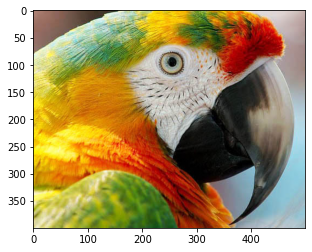

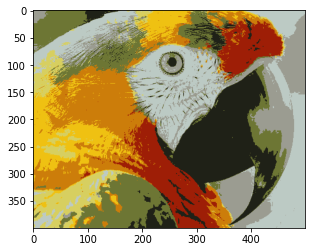

In [0]:
original_image, img = load_image('parrot.jpg')
centroids, idx = KMeans(img, iterations=10, K=8)
compress_image(original_image, centroids, idx)

In [0]:
K = 4
original_size = original_image.shape[0] * original_image.shape[0] * 3
new_size = 24*K + original_image.shape[0] * original_image.shape[0] * np.log2(K)

print("Size of the original image in bytes", original_size)
print("Size of the compressed image in bytes", new_size)
print("Compression rate: %.2f" % (new_size/original_size*100))

Size of the original image in bytes 480000
Size of the compressed image in bytes 320096.0
Compression rate: 66.69
